In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class SimpleKMeans:
    def __init__(self, n_clusters, max_iterations=100, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tol = tol
        self.cluster_centers_ = None

    def _initialize_centroids(self, data):
        centroids = [data[np.random.choice(data.shape[0])]]
        
        for _ in range(1, self.n_clusters):
            distance2 = np.min([np.linalg.norm(data - c, axis=1)**2 for c in centroids], axis=0)
            probs = distance2 / np.sum(distance2)
            next_centroid = data[np.random.choice(data.shape[0], p=probs)]
            centroids.append(next_centroid)
            
        return np.array(centroids)

    def fit(self, data):

        # 1. 초기화: 데이터에서 KMeans++ 방법으로 K개의 중심점 선택
        self.cluster_centers_ = self._initialize_centroids(data)

        for _ in range(self.max_iterations):
            # 2. 할당: 각 데이터 포인트를 가장 가까운 중심점에 할당
            distances = np.linalg.norm(data[:, np.newaxis] - self.cluster_centers_, axis=2)
            labels = np.argmin(distances, axis=1)
            
            # 3. 업데이트: 각 클러스터의 평균을 계산하여 새로운 중심점을 정함
            new_centers = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # 4. 수렴 확인: 중심점의 변화가 tol보다 작으면 종료
            if np.all(np.abs(new_centers - self.cluster_centers_) < self.tol):
                break

            self.cluster_centers_ = new_centers

        return self

    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

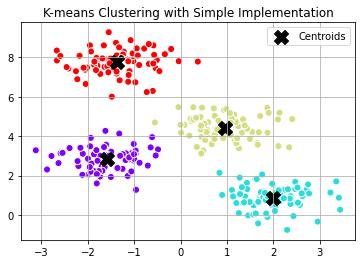

In [2]:
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

simple_kmeans = SimpleKMeans(n_clusters=4)
simple_kmeans.fit(data)
simple_clusters = simple_kmeans.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=simple_clusters, cmap='rainbow', marker='o', edgecolors='w', s=50)
plt.scatter(simple_kmeans.cluster_centers_[:, 0], simple_kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='X')
plt.legend()
plt.grid(True)
plt.title('K-means Clustering with Simple Implementation')
plt.show()